@article{Pilgrim2021, 
         doi = {10.21105/joss.03859}, 
         url = {https://doi.org/10.21105/joss.03859}, 
         year = {2021}, publisher = {The Open Journal}, 
         volume = {6}, 
         number = {68}, 
         pages = {3859}, 
         author = {Charlie Pilgrim}, 
         title = {piecewise-regression (aka segmented regression) in Python}, 
         journal = {Journal of Open Source Software} 
        }

In [1]:
# General-level imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Special-case libraries/modules
import piecewise_regression

# Personal/local libraries and module imports
import reg

In [2]:
path = f"data{os.sep}"
filenames = ["phys_data_2023-03-12_side0.csv",
            "simulated_event_profiles.csv",
            "solo_ept_sun_e.csv"]

index_col_names = ["TimeUTC",
                  "datetime",
                  "datetime"]

index = 0

df = pd.read_csv(f"{path}{filenames[index]}", parse_dates=True, index_col=index_col_names[index])

display(df)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,E1,E2,E3,E4,E5,E6,E7,DT,PA
TimeUTC,,,,,,,,,,,,,,,,,,
2023-03-12 00:00:00,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,0.0,0.0,11.40,0.0,0.0,0.000,0.000,0.00,86.490453
2023-03-12 00:00:24,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0144,167.0,0.0,7.58,0.0,0.0,0.000,0.000,0.00,81.321720
2023-03-12 00:00:48,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,0.0,0.0,0.00,0.0,0.0,0.627,0.000,0.00,69.690026
2023-03-12 00:01:12,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,112.0,17.6,0.00,0.0,0.0,0.313,0.000,0.00,70.727876
2023-03-12 00:01:36,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,55.8,0.0,0.00,0.0,0.0,0.000,0.000,0.00,68.520445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-14 23:58:00,61.2,7.14,3.95,3.42,1.590,0.000,0.142,0.0671,0.0144,7090.0,2200.0,865.00,325.0,10.5,0.314,0.000,1.29,100.899747
2023-03-14 23:58:24,24.5,14.30,9.88,5.70,1.590,0.954,0.142,0.0671,0.0000,5030.0,1920.0,819.00,309.0,21.0,0.000,0.088,1.12,84.530333
2023-03-14 23:58:48,61.2,21.40,9.89,2.28,1.590,0.000,0.142,0.0671,0.0000,6480.0,2360.0,895.00,262.0,16.8,0.314,0.000,1.46,95.456014


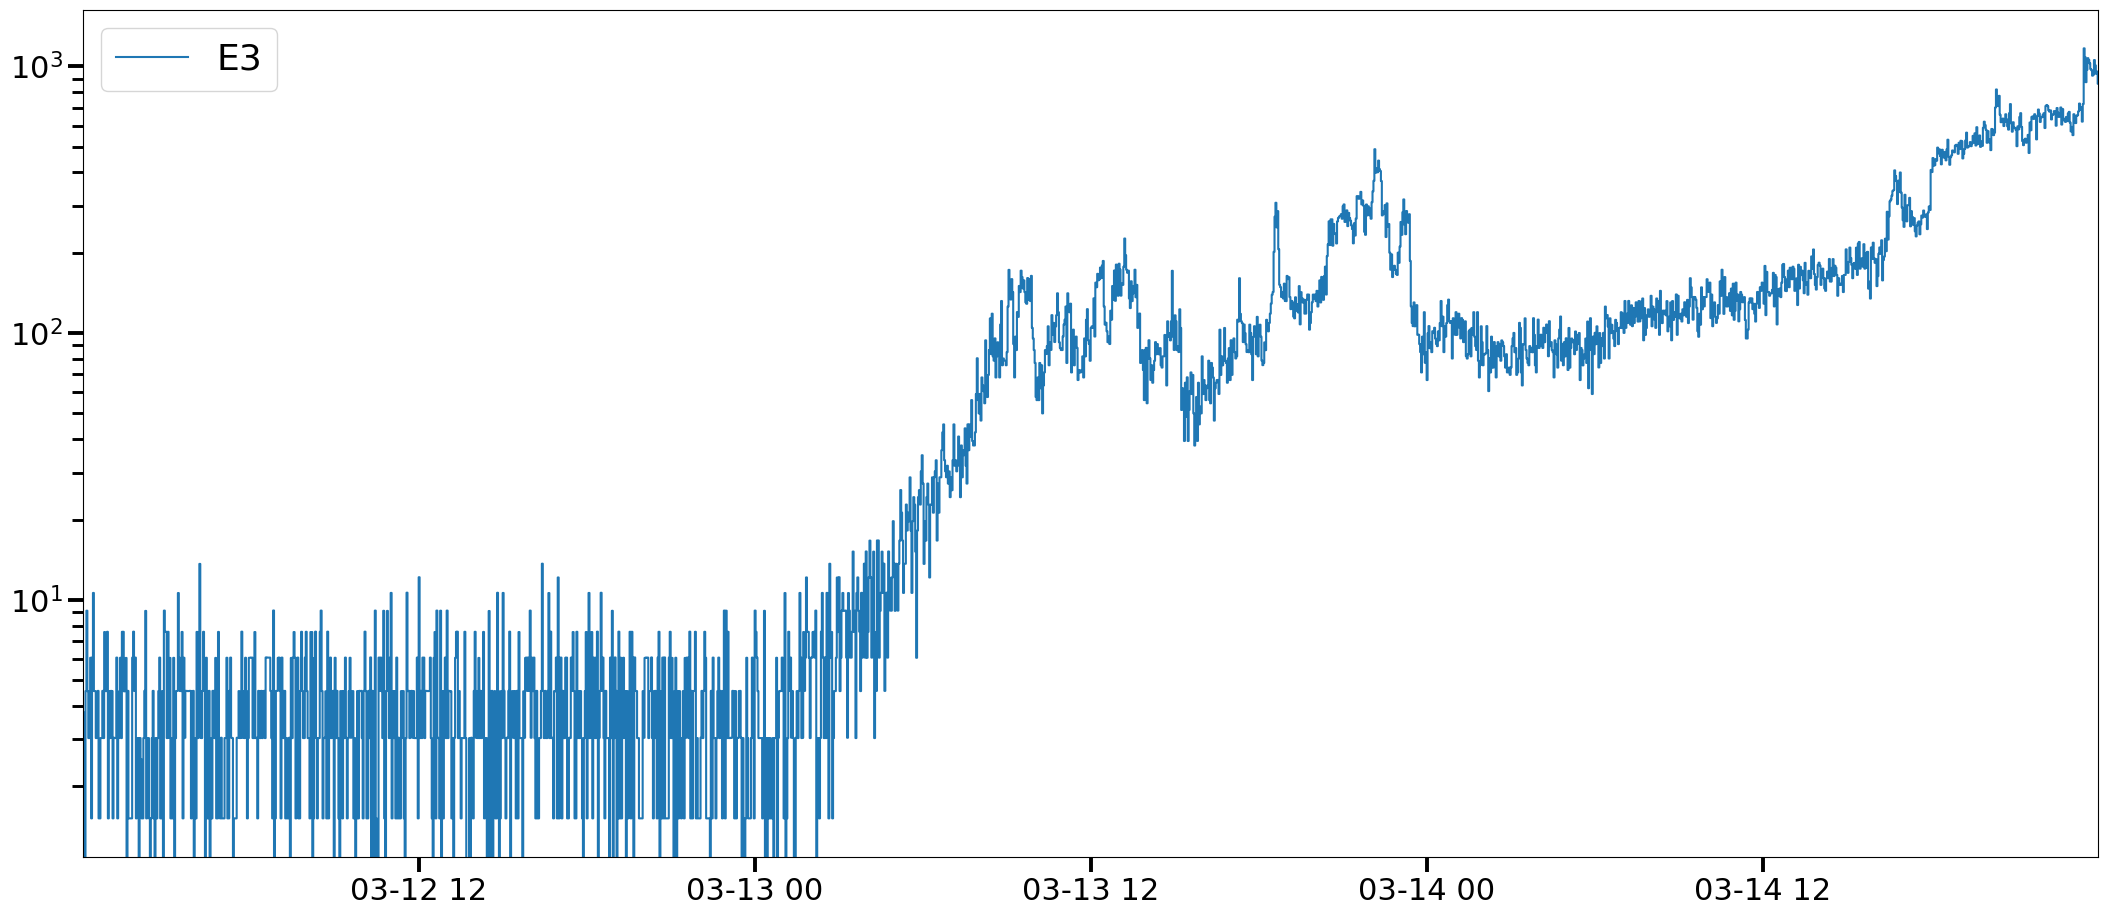

In [3]:
channel = "E3"
reg.quicklook(data=df, channel=channel, resample="2 min")

Data selection: 2023-03-12 00:02:30, 2023-03-13 09:27:30
Regression converged: True


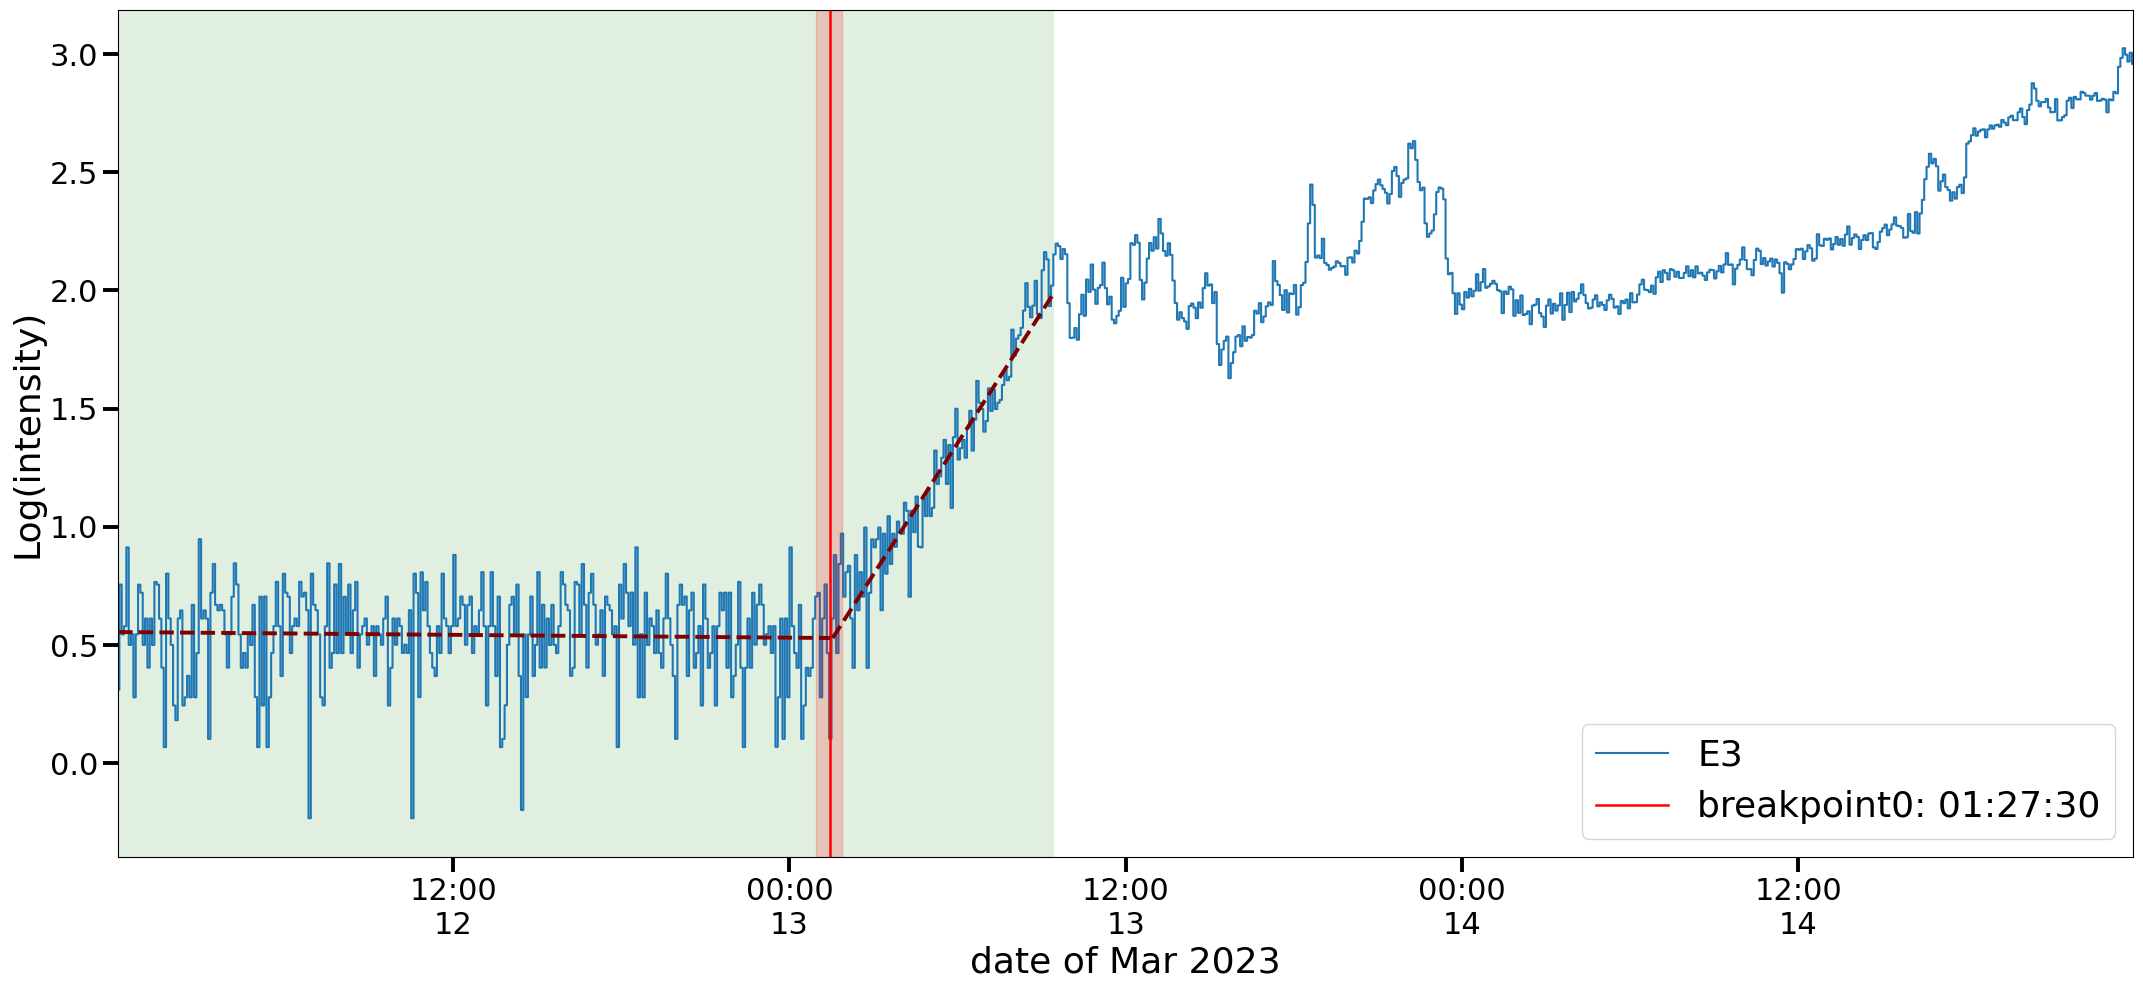

In [30]:
results  = reg.workflow(data=df, channel=channel, window=20, threshold=2.1, diagnostics=True, breaks=1,
                              index_choice="counting_numbers", resample="5 min", plot_style="step")

In [31]:
results

{'const': np.float64(0.5539227426464248),
 'alpha0': np.float64(-8.295969379822868e-05),
 'alpha1': np.float64(0.015420036522022399),
 'breakpoint0': Timestamp('2023-03-13 01:27:30'),
 'breakpoint0_errors': (Timestamp('2023-03-13 00:57:30'),
  Timestamp('2023-03-13 01:52:30')),
 'series': TimeUTC
 2023-03-12 00:02:30    0.310285
 2023-03-12 00:07:30    0.754985
 2023-03-12 00:12:30    0.543877
 2023-03-12 00:17:30    0.578639
 2023-03-12 00:22:30    0.912181
                          ...   
 2023-03-13 09:07:30    2.162614
 2023-03-13 09:12:30    2.131298
 2023-03-13 09:17:30    1.933993
 2023-03-13 09:22:30    2.020998
 2023-03-13 09:27:30    2.152645
 Freq: 5min, Name: E3, Length: 402, dtype: float64,
 'indices': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,

Text(0, 0.5, 'log(Intensity)')

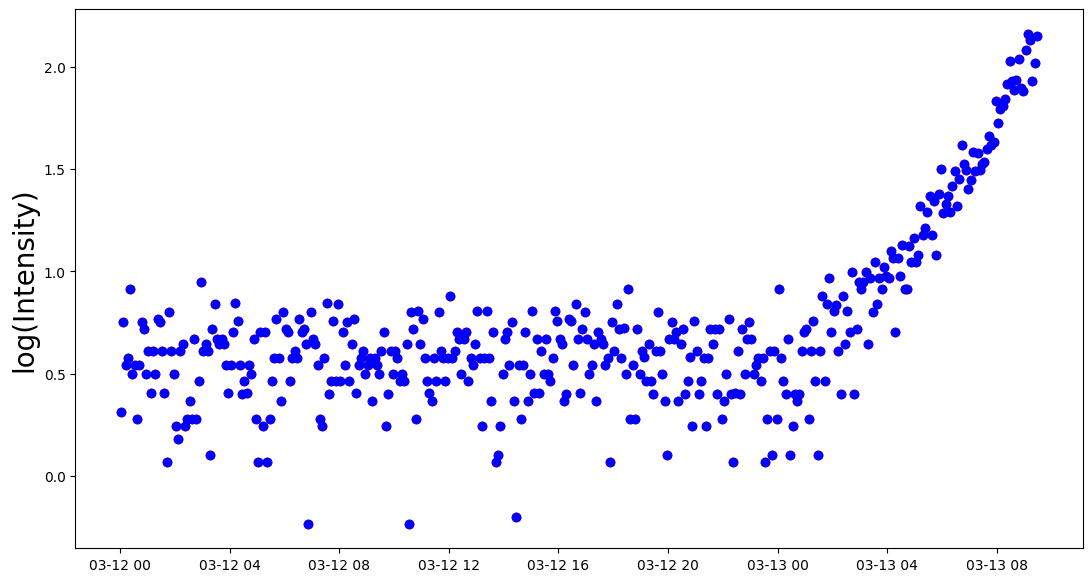

In [11]:
fig, ax = plt.subplots(figsize=(13,7))

ax.scatter(pd.to_datetime(results["indices"], unit='s'), results["series"].values, color="red")
ax.scatter(results["series"].index, results["series"].values, color="blue")
ax.set_ylabel("log(Intensity)", fontsize=reg.plotting_utilities.STANDARD_AXIS_LABELSIZE)

In [13]:
print(pd.to_datetime(results["indices"][0], unit='s'), pd.to_datetime(results["indices"][-1], unit='s'))

2023-03-12 00:02:30 2023-03-13 09:27:30


In [14]:
tresult1 = reg.break_regression(ints=results["series"].values, indices=results["indices"])

In [15]:
tresult1["estimates"]

{'const': {'estimate': np.float64(464.73535236495826),
  'se': np.float64(685.5421707043921),
  'confidence_interval': (np.float64(-883.001015893318),
   np.float64(1812.4717206232347)),
  't_stat': np.float64(0.6779092114602437),
  'p_t': np.float64(0.4982231682411524)},
 'beta1': {'estimate': np.float64(5.167665405272073e-05),
  'se': np.float64(2.224620176842975e-06),
  'confidence_interval': (np.float64(4.730317909229372e-05),
   np.float64(5.6050129013147733e-05)),
  't_stat': np.float64(23.229427922413528),
  'p_t': '-'},
 'breakpoint1': {'estimate': np.float64(1678670876.6839375),
  'se': np.float64(814.0999442010514),
  'confidence_interval': (np.float64(1678669276.2104013),
   np.float64(1678672477.1574738)),
  't_stat': '-',
  'p_t': '-'},
 'alpha1': {'estimate': np.float64(-2.765323126501704e-07),
  'se': np.float64(4.0839515291320874e-07),
  'confidence_interval': (np.float64(-1.0794136286689765e-06),
   np.float64(5.263490033686357e-07)),
  't_stat': np.float64(-0.67711947

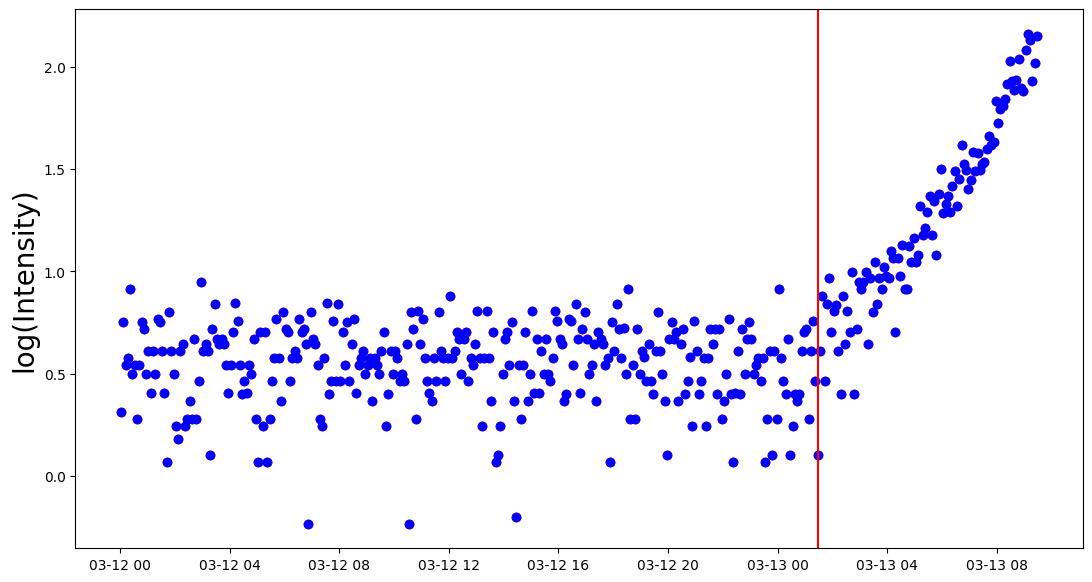

In [16]:
ax.axvline(x=pd.to_datetime(tresult1["estimates"]["breakpoint1"]["estimate"], unit='s'), color="red")

fig

In [17]:
pd.to_datetime(tresult1["estimates"]["breakpoint1"]["estimate"], unit='s')

Timestamp('2023-03-13 01:27:56.683937550')

In [18]:
const, list_of_alphas, list_of_breakpoints, list_of_breakpoint_errs = reg.unpack_fit_results(fit_results=tresult1["estimates"],
                                                                                             num_of_breaks=1)

In [19]:
list_of_fits = reg.calc.generate_fit_lines(data_df=results["data_df"], indices=results["indices"], const=const,
                                        list_of_alphas=list_of_alphas, 
                                        list_of_breakpoints=list_of_breakpoints,
                                       index_choice="time_s")

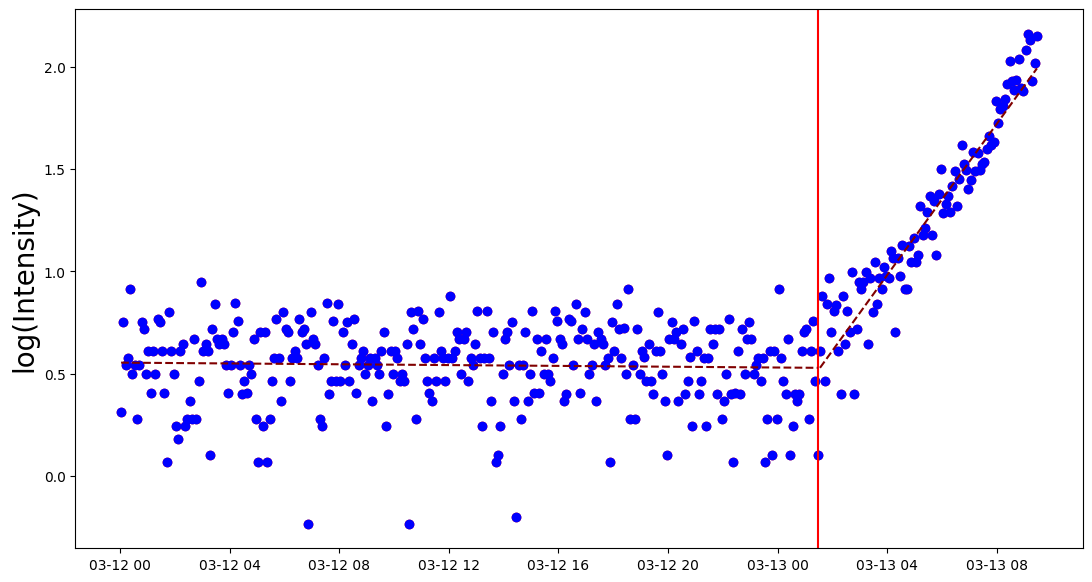

In [20]:
for i, fit in enumerate(list_of_fits):
    ax.plot(pd.to_datetime(fit.index, unit='s'), fit.values, color="maroon", ls="--")

fig

In [21]:
print(list_of_fits[0].index[0], list_of_fits[-1].index[-1])

2023-03-12 00:02:30 2023-03-13 09:27:30


/tmp/ipykernel_25890/3607405526.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axx.legend()


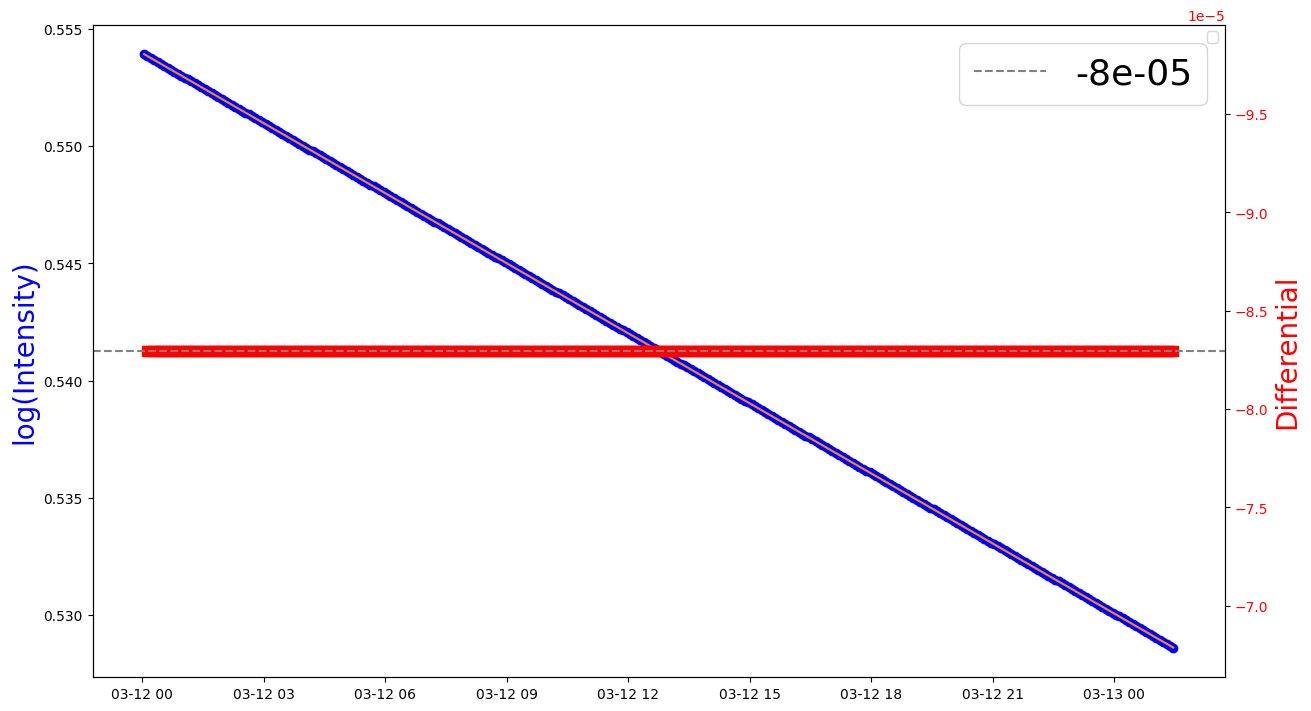

In [22]:
fit = list_of_fits[0]

figg, axx = plt.subplots(figsize=(13,7), layout="constrained")

axx.scatter(fit.index, fit.values, color="blue")
axx.plot(fit.index, fit.values, color="darkorange")
axx.set_ylabel("log(Intensity)", fontsize=reg.plotting_utilities.STANDARD_AXIS_LABELSIZE, color="blue")

axx.legend()

axx1 = axx.twinx()
diff_mode = fit.diff().mode()[0]
axx1.set_ylim([diff_mode-diff_mode/5, diff_mode+diff_mode/5])
axx1.scatter(fit.index, fit.diff(), s=55, marker='s', color="red")
axx1.axhline(y=diff_mode, label=f"{np.round(diff_mode,5)}", ls="--", color="grey")
axx1.set_ylabel("Differential", fontsize=reg.plotting_utilities.STANDARD_AXIS_LABELSIZE, color="red")
axx1.tick_params(axis='y', labelcolor="red")

axx1.legend(fontsize=reg.plotting_utilities.STANDARD_LEGENDSIZE)

plt.show()